In [1]:
import numpy as np
from pylab import *
import copy

(100, 2)


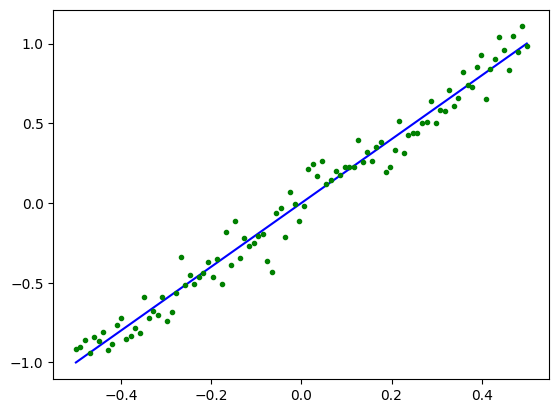

In [13]:
N = 100

# Generación de datos
data = np.array([(x, 2 * x + 1.0) for x in linspace(7, 8, num = N)])
data = data - data.mean(axis = 0)
plot(data[:, 0], data[:, 1], 'b-')

# Generación de datos con ruido
data = np.array([(x, 2 * x + 1.0 + + np.random.normal(0.0, 0.1)) for x in linspace(7, 8, num = N)])
data = data - data.mean(axis=0)
plot(data[:, 0], data[:, 1], 'g.')

print(shape(data))

In [14]:
def lineal(x, a, b):
  return a * x + b

def loss(yi, x, a, b):
  return (yi - lineal(x, a, b)) ** 2 #error cuadrático

def grad(yi, x, a, b):
  fact = 2 * (yi - lineal(x, a, b))
  da = -x * fact
  db = -1.0 * fact
  return np.array([da, db])

## Metodo del Gradiente Descendiente Estocastico (SGD - Normal)

$x_{k+1}=x_{n}-\alpha 1/n sum(\nabla f(x_{n})) $

In [35]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 500

# Seteamos nuestro Alfa (tasa de aprendizaje)
step = 0.1

# Seteamos el tamaño del batch (cantidad de datos a usar en cada paso)
batch_size = 2

ak = np.zeros(Nsteps + 1)
bk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

ak[0] = 1.0
bk[0] = 0.0
fk[0] = np.mean(loss(data[:, 1], data[:, 0], ak[0], bk[0]))

In [36]:
# Iteramos Nsteps veces, para obtener los valores de a y b en cada paso, y el error cuadrático medio (fk)
for ii in range(Nsteps):
  
  # Seleccionamos un batch aleatorio de datos
  idx = np.random.choice(N, size = batch_size)
  points = data[idx]

  # Sumatoria de los gradientes para cada uno de los puntos seleccionados
  geval = 0
  for pp in points:
    geval += (1 / batch_size) * grad(pp[1], pp[0], ak[ii], bk[ii]) 
 
  ak[ii + 1] = ak[ii] - step * geval[0]
  bk[ii + 1] = bk[ii] - step * geval[1]
  fk[ii + 1] = np.mean(loss(data[:, 1], data[:, 0], ak[ii + 1], bk[ii + 1]))

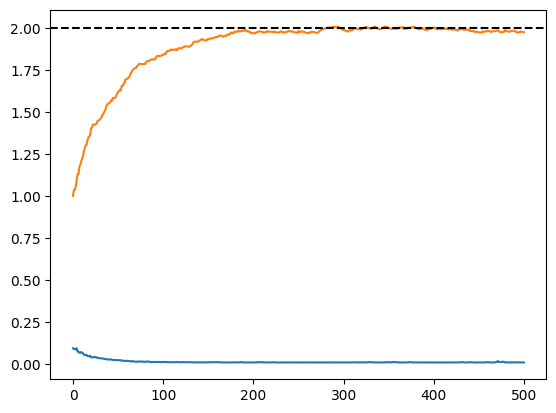

In [37]:
plot(fk)
plot(ak)
axhline(2.0, color='k', ls='--')

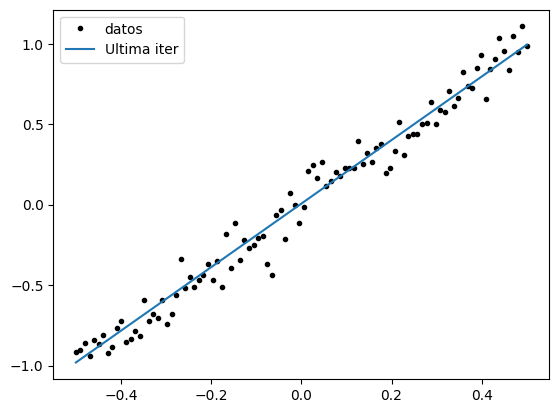

In [38]:
plot(data[:, 0], data[:, 1], 'k.', label='datos')
plot(data[:, 0], lineal(data[:, 0], ak[-1], bk[-1]), label='Ultima iter')
legend()

## Adagrad

In [83]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 500

# Seteamos nuestro Alfa (tasa de aprendizaje) y epsilon
step = 0.1
epsilon = 1e-8

# Seteamos el tamaño del batch (cantidad de datos a usar en cada paso)
batch_size = 2

ak = np.zeros(Nsteps + 1)
bk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

ak[0] = 1.0
bk[0] = 0.0
fk[0] = np.mean(loss(data[:, 1], data[:, 0], ak[0], bk[0]))

rk = np.zeros((Nsteps + 1, 2))

In [84]:
# Iteramos Nsteps veces, para obtener los valores de a y b en cada paso, y el error cuadrático medio (fk)

for ii in range(Nsteps):
  
  # Seleccionamos un batch aleatorio de datos
  idx = np.random.choice(N, size = batch_size)
  points = data[idx]

  # Sumatoria de los gradientes para cada uno de los puntos seleccionados y 
  geval = 0
  for pp in points:
    geval += (1 / batch_size) * grad(pp[1], pp[0], ak[ii], bk[ii])
  
  rk[ii + 1] = rk[ii] + geval ** 2

  ak[ii + 1] = ak[ii] - (step / (np.sqrt(rk[ii + 1][0]) + epsilon)) * geval[0]
  bk[ii + 1] = bk[ii] - (step / (np.sqrt(rk[ii + 1][1]) + epsilon)) * geval[1]
  
  fk[ii + 1] = np.mean(loss(data[:, 1], data[:, 0], ak[ii + 1], bk[ii + 1]))

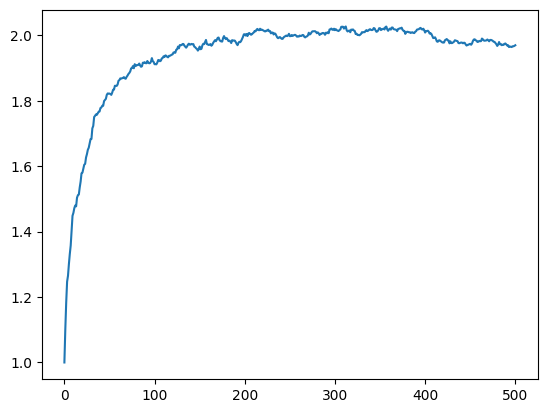

In [85]:
plot(ak)

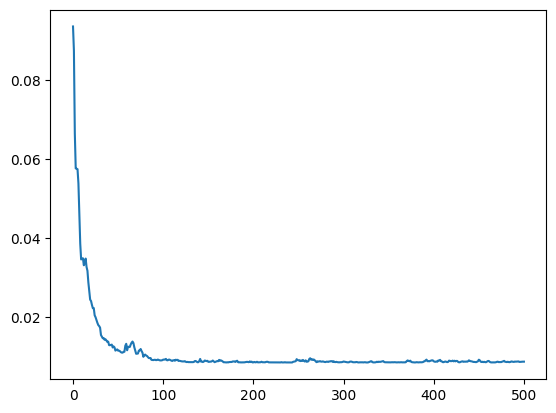

In [86]:
plot(fk)

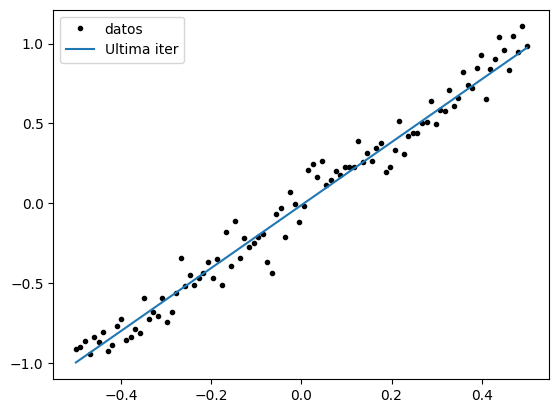

In [87]:
plot(data[:, 0], data[:, 1], 'k.', label='datos')
plot(data[:, 0], lineal(data[:, 0], ak[-1], bk[-1]), label='Ultima iter')
legend()

## RMSProp

In [100]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 500

# Seteamos nuestro Alfa (tasa de aprendizaje) y epsilon
step = 0.1
epsilon = 1e-8
beta = 0.9

# Seteamos el tamaño del batch (cantidad de datos a usar en cada paso)
batch_size = 2

ak = np.zeros(Nsteps + 1)
bk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

ak[0] = 1.0
bk[0] = 0.0
fk[0] = np.mean(loss(data[:, 1], data[:, 0], ak[0], bk[0]))

rk = np.zeros((Nsteps + 1, 2))

In [101]:
# Iteramos Nsteps veces, para obtener los valores de a y b en cada paso, y el error cuadrático medio (fk)

for ii in range(Nsteps):
  
  # Seleccionamos un batch aleatorio de datos
  idx = np.random.choice(N, size = batch_size)
  points = data[idx]

  # Sumatoria de los gradientes para cada uno de los puntos seleccionados y 
  geval = 0
  for pp in points:
    geval += (1 / batch_size) * grad(pp[1], pp[0], ak[ii], bk[ii])
  
  rk[ii + 1] = beta * rk[ii] + (1 - beta) * (geval ** 2)

  ak[ii + 1] = ak[ii] - (step / (np.sqrt(rk[ii + 1][0]) + epsilon)) * geval[0]
  bk[ii + 1] = bk[ii] - (step / (np.sqrt(rk[ii + 1][1]) + epsilon)) * geval[1]
  
  fk[ii + 1] = np.mean(loss(data[:, 1], data[:, 0], ak[ii + 1], bk[ii + 1]))

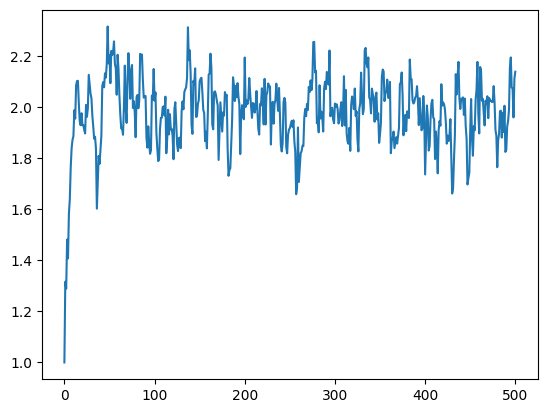

In [102]:
plot(ak)

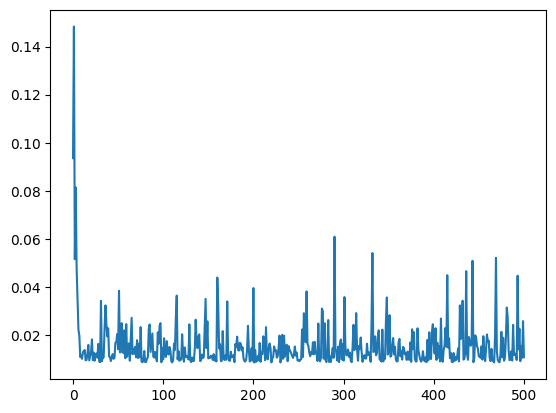

In [103]:
plot(fk)

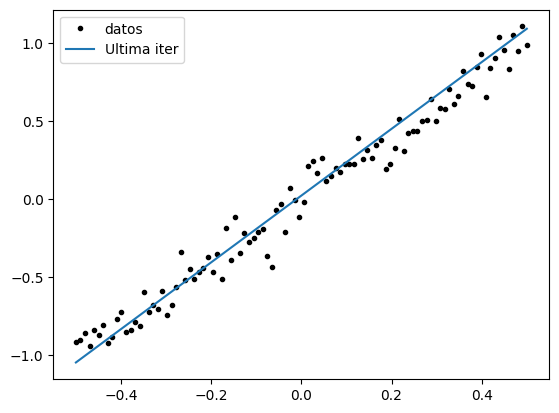

In [104]:
plot(data[:, 0], data[:, 1], 'k.', label='datos')
plot(data[:, 0], lineal(data[:, 0], ak[-1], bk[-1]), label='Ultima iter')
legend()

## Adam

In [115]:
# Seteamos la cantidad de iteraciones (pasos) a realizar
Nsteps = 500

# Seteamos nuestro Alfa (tasa de aprendizaje) y epsilon
step = 0.1
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999

# Seteamos el tamaño del batch (cantidad de datos a usar en cada paso)
batch_size = 2

ak = np.zeros(Nsteps + 1)
bk = np.zeros(Nsteps + 1)
fk = np.zeros(Nsteps + 1)

ak[0] = 1.0
bk[0] = 0.0
fk[0] = np.mean(loss(data[:, 1], data[:, 0], ak[0], bk[0]))

rk = np.zeros((Nsteps + 1, 2))
sk = np.zeros((Nsteps + 1, 2))

In [116]:
# Iteramos Nsteps veces, para obtener los valores de a y b en cada paso, y el error cuadrático medio (fk)

for ii in range(Nsteps):
  
  # Seleccionamos un batch aleatorio de datos
  idx = np.random.choice(N, size = batch_size)
  points = data[idx]

  # Sumatoria de los gradientes para cada uno de los puntos seleccionados y 
  geval = 0
  for pp in points:
    geval += (1 / batch_size) * grad(pp[1], pp[0], ak[ii], bk[ii])
  
  rk[ii + 1] = beta1 * rk[ii] + (1 - beta1) * geval
  sk[ii + 1] = beta2 * sk[ii] + (1 - beta2) * (geval ** 2)

  rk_sombrero = rk[ii + 1] / (1 - beta1 ** (ii + 1))
  sk_sombrero = sk[ii + 1] / (1 - beta2 ** (ii + 1))

  ak[ii + 1] = ak[ii] - (step / (np.sqrt(sk_sombrero[0]) + epsilon)) * rk_sombrero[0]
  bk[ii + 1] = bk[ii] - (step / (np.sqrt(sk_sombrero[1]) + epsilon)) * rk_sombrero[1]
  
  fk[ii + 1] = np.mean(loss(data[:, 1], data[:, 0], ak[ii + 1], bk[ii + 1]))

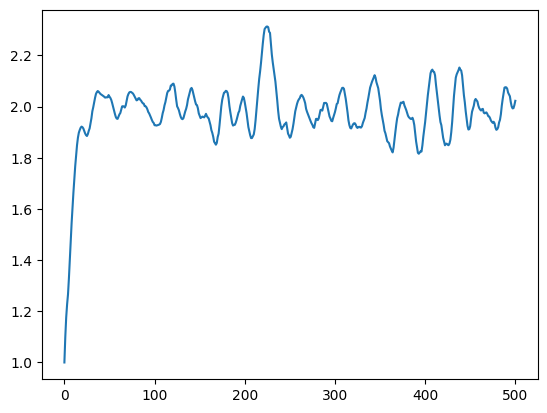

In [117]:
plot(ak)

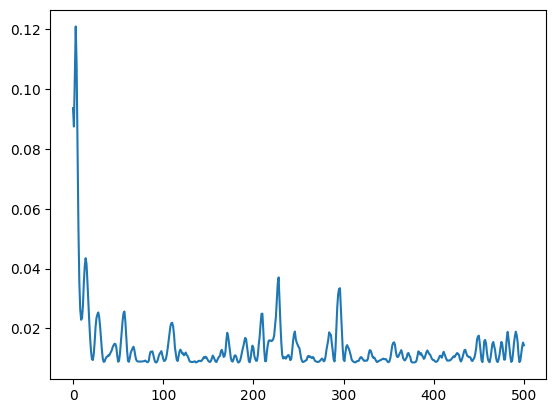

In [118]:
plot(fk)

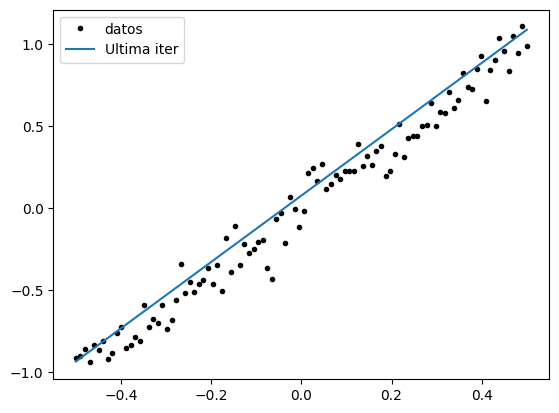

In [119]:
plot(data[:, 0], data[:, 1], 'k.', label='datos')
plot(data[:, 0], lineal(data[:, 0], ak[-1], bk[-1]), label='Ultima iter')
legend()